In [8]:
import numpy as np 
import pandas as pd
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
from google.colab import files
uploaded = files.upload()


Saving indian_food.csv to indian_food.csv


In [13]:
df= pd.read_csv("indian_food.csv")
df.head(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ae0307990>,
      dtype=object)

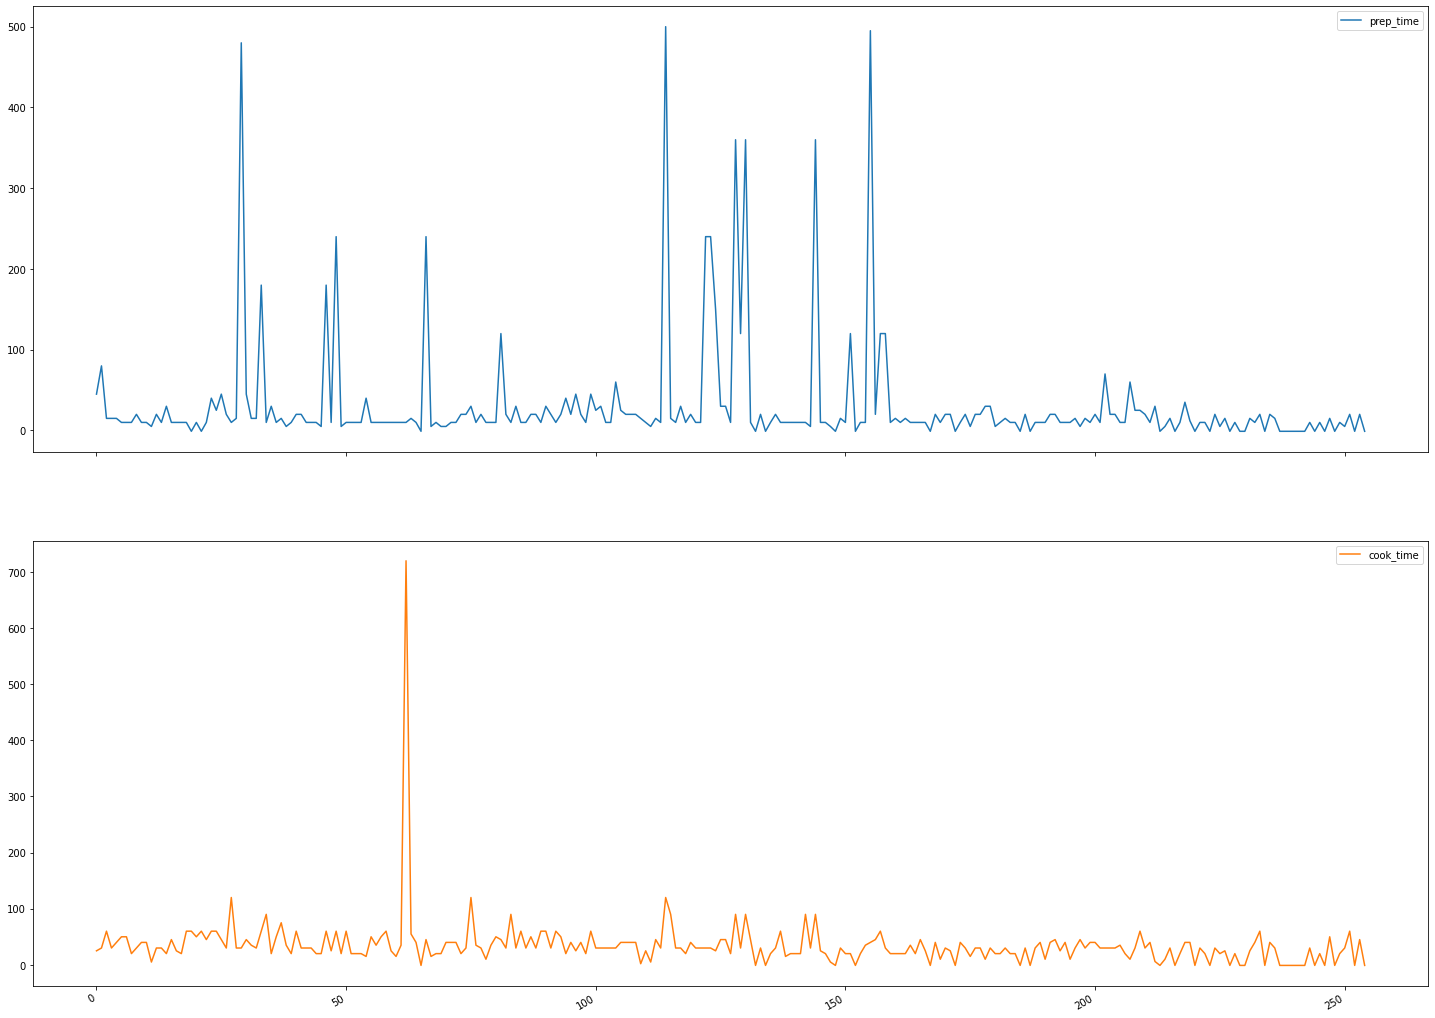

In [14]:
df.plot(subplots=True, figsize=(25,20))

In [57]:
final_dataset = df.pivot(index = 'name',columns = 'diet')
final_dataset.head()

ingredients  ...     region
diet              non vegetarian  ... vegetarian
name                              ...           
Adhirasam                    NaN  ...       East
Aloo gobi                    NaN  ...      North
Aloo matar                   NaN  ...      North
Aloo methi                   NaN  ...      North
Aloo shimla mirch            NaN  ...      North

[5 rows x 12 columns]

In [123]:
#df_na = df.pop('cook_time')
#df_nb = df.pop('prep_time')

In [110]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [111]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [112]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [128]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [ ]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

In [ ]:
def get_food_recommendation(food_name):
    n_food_to_reccomend = 10
    food_list = final_dataset[df['name'].str.contains(food_name)]  
    if len(food_list):        
        food_idx= food_list.iloc[0]['index']
        food_idx = final_dataset[df['index'] == food_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[food_idx],n_neighbors=n_food_to_reccomend+1)    
        rec_food_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_food_indices:
            food_idx = final_dataset.iloc[val[0]]['index']
            idx = final_dataset[df['index'] == food_idx].index
            recommend_frame.append({'Name':food.iloc[idx]['name'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_food_to_reccomend+1))
        return df